# Predicting heart disease using Machine Learning

This notebook looks into using various Python based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting whether or not someone has heart disease based on thier medical attributes.
The goal is to not get less than 95% accuracy on the model.

## Data

The original data came from Clevland data from the UCI Machine Learning Repository. https://archive.ics.uci.edu/dataset/45/heart+disease


In [1]:
# Regular EDA and plotting libraries}
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Models from scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay

## Load Data

In [9]:
df = pd.read_csv("heart-disease.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Exploring the Data


In [10]:
df["target"].value_counts()


target
1    165
0    138
Name: count, dtype: int64

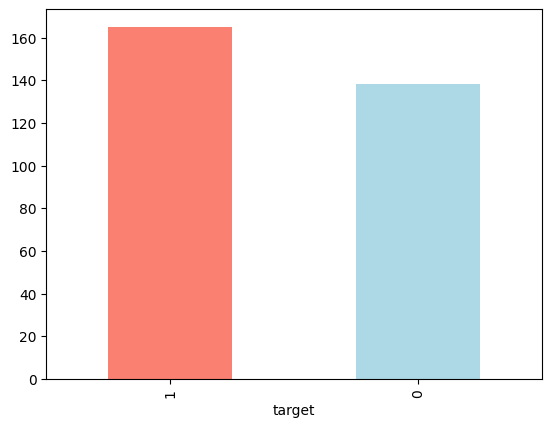

In [11]:
df["target"].value_counts().plot(kind="bar", color=["salmon", "lightblue"]);

In [12]:
#Checking for missing values
df.info()
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [13]:
# Heart disease frequency according to sex
df.sex.value_counts()


sex
1    207
0     96
Name: count, dtype: int64

In [14]:
pd.crosstab(df.target, df.sex)


sex,0,1
target,,
0,24,114
1,72,93


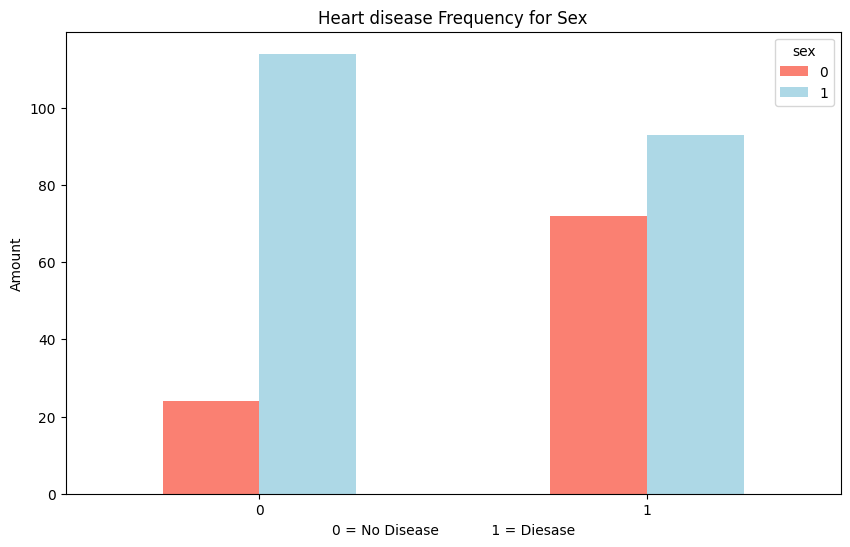

In [15]:
# This shows that peope who dont have heart disease are mostly male, and people who do have heart disease are more male but the ratio is compared to female different.
pd.crosstab(df.target, df.sex).plot(kind="bar",
                                    figsize=(10,6),
                                    color=["salmon","lightblue"]);
plt.title("Heart disease Frequency for Sex")
plt.xlabel("0 = No Disease            1 = Diesase")
plt.ylabel("Amount")
plt.xticks(rotation=0);

### Age vs Max Heart Rate for Heart Disease`

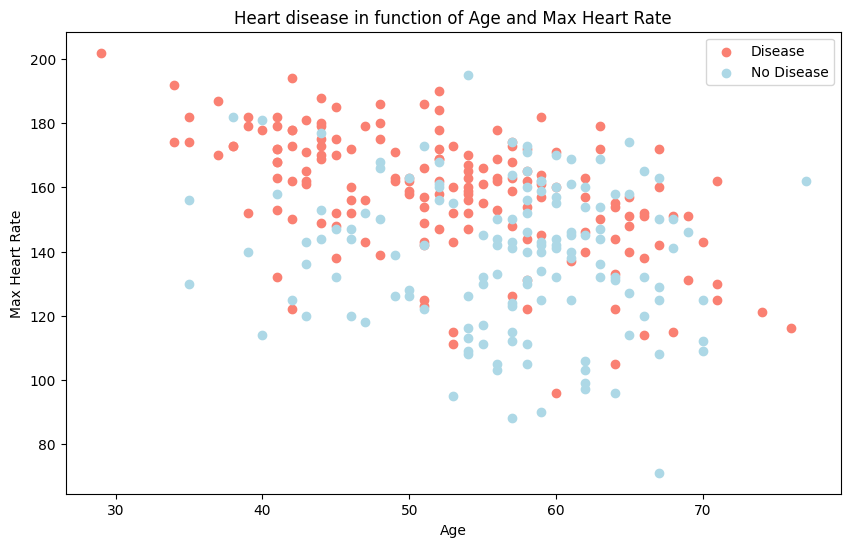

In [16]:
plt.figure(figsize=(10,6));
#These are the patients with heart disease
plt.scatter(df.age[df.target==1],
           df.thalach[df.target==1],
           c="salmon");
#These are the patients without heart disease
plt.scatter(df.age[df.target==0],
           df.thalach[df.target==0],
           c="lightblue");
#Adding some communications
plt.title("Heart disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"])
plt.show()

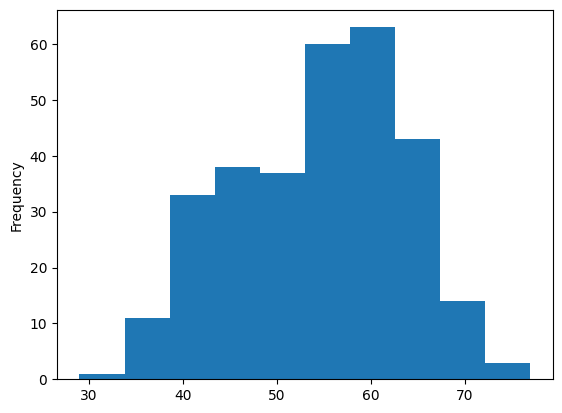

In [17]:
#We check the age range
df.age.plot.hist();

### Heart Disease Frequency Per Chest pain
0: Typical angina

1: Atypical angina 

2: Non-anginal pain 

3: Asymptomatic 

Note: Full Meaning of each of thoes are in the Dataset at https://archive.ics.uci.edu/dataset/45/heart+disease

In [18]:
pd.crosstab(df.cp, df.target)


target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


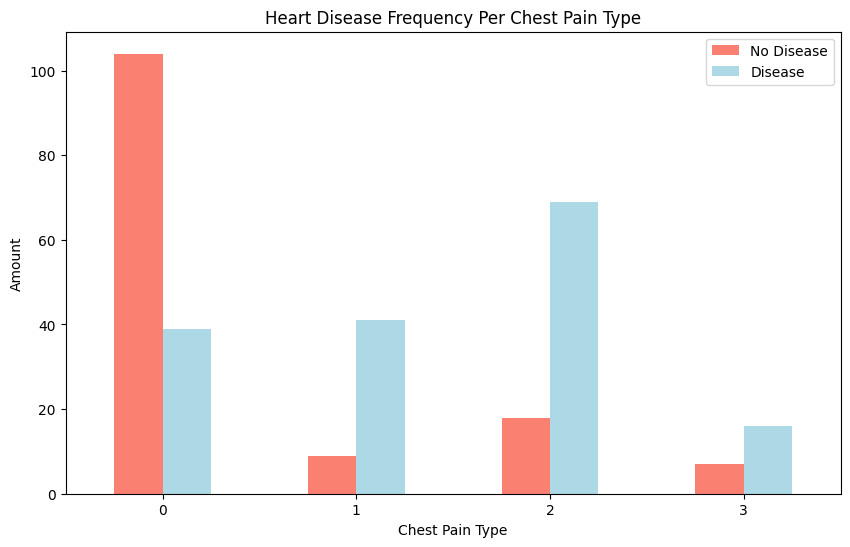

In [19]:
# Make the crosstab more visual
pd.crosstab(df.cp, df.target).plot(kind="bar",
                                   figsize=(10,6),
                                   color=["salmon","lightblue"])
#Adding some communications
plt.title("Heart Disease Frequency Per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation=0)
plt.show()

In [20]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


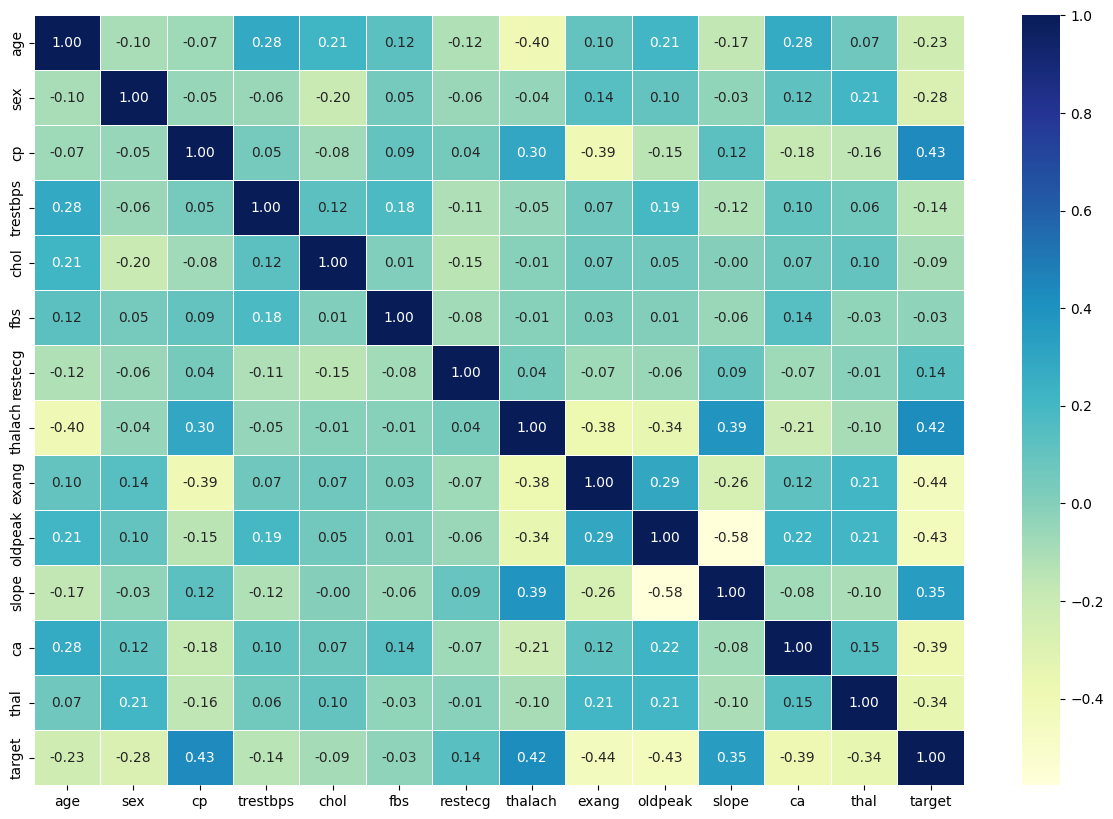

In [21]:
# Make a correlation matrix
df.corr()
# We make the correlation matrix prettier so it's easier to understand
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu")


## Preparing Our Data for Machine Learning

In [22]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [23]:
# Split data into x and y
x = df.drop("target", axis=1)
y = df["target"]
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [24]:
# Splitting Our Data into Train and Test Sets
np.random.seed(42)
x_train, x_test, y_train, y_test = train_test_split(x,
                                                   y,
                                                   test_size=0.2)


NameError: name 'train_test_split' is not defined

In [25]:
x_train

NameError: name 'x_train' is not defined

In [26]:
y_train, len(y_train)

NameError: name 'y_train' is not defined

### Building a machine learning model
Now that we've got our data split into training and test sets, it's time to build a machine learning model.  
We'll train it (find patterns) on the training set.  
And we'll test it (Use the patterns) on the test set. 

We are going to try out 3 Machine Learining Models:
1. Logistic Regression
2. K-Nearest Neighbours Classifier
3. Random Forest Classifier

In [27]:
# Put models in a dictionary
models = {"Logistics regression": LogisticRegression(),
          "KNN":KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier()}

# Create a function to fit and score models
def fit_and_score(models, x_train, x_test, y_train, y_test):
    """
    Fits and evaluates given Machine Learning models.
    models : a dict of differentn Scikit-Learn Machine Learning models
    x_train : training data (no labels)
    x_test : testing data (no labels)
    y_train : training labels
    y_test : training labels
    """
    # Set Random seed
    np.random.seed(42)
    # Make a dictionary to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fitting the models
        model.fit(x_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(x_test, y_test)
    return model_scores

NameError: name 'LogisticRegression' is not defined

In [21]:
model_scores = fit_and_score(models = models,
                            x_train = x_train,
                            x_test = x_test,
                            y_train = y_train,
                             y_test = y_test)
model_scores

C:\Users\shkob\Downloads\heart_disease_project\env\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistics regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

### Model Comparison

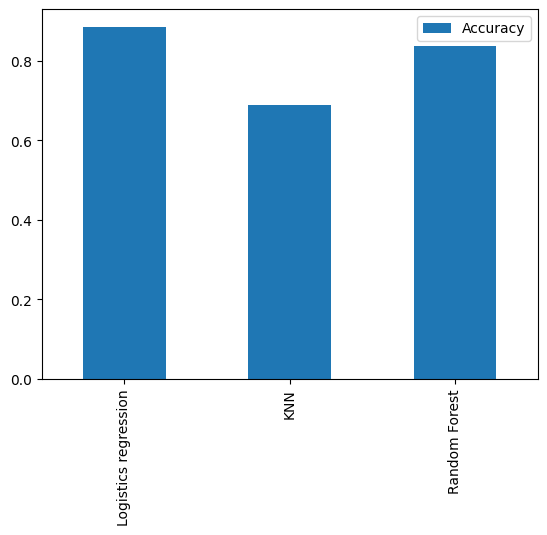

In [22]:
model_compare = pd.DataFrame(model_scores, index=["Accuracy"])
model_compare.T.plot.bar(); # Transposed it because it looks better and makes more sense.                          

### Hyperparameter Tuning
We're going to only tune:
1. LogisticRegression()
2. RandomForestClassifier() 

Using RandomizedSearchCV & GridSearchCV


In [23]:
#Create a hyperparameter grid for LogisticsRegression
log_reg_grid = {"C": np.logspace(-4,4,20),
               "solver": ["liblinear"]}

#Create a hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange (2,20,2),
           "min_samples_leaf": np.arange(1,20,2)}


Now that we got the hyperparameter grids setup for each of the models, we will tune them using RandomizedSearchCV.

In [24]:
#Tune LogisticsRegression
np.random.seed(42)
#Setup random hypterparameter search for LogisticsRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)
#Fit random hyperparameter search model for LogisticsRegression
rs_log_reg.fit(x_train, y_train)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [25]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': np.float64(0.23357214690901212)}

In [26]:
rs_log_reg.score(x_test, y_test)

0.8852459016393442

Now we've tuned LogisticRegression(), let's do the same for RandomForestClassifier()

In [27]:
#Tune RandomForestClassifier
np.random.seed(42)
#Setup random hypterparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                                param_distributions=rf_grid,
                                cv=5,
                                n_iter=5,
                                verbose=True)
#Fit random hyperparameter search model for LogisticsRegression
rs_rf.fit(x_train, y_train)


Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [28]:
#Find the best hypterparameters
rs_rf.best_params_

{'n_estimators': np.int64(560),
 'min_samples_split': np.int64(16),
 'min_samples_leaf': np.int64(17),
 'max_depth': 5}

In [29]:
#Evaluate the Randomized search RandomForestClassifier's model
rs_rf.score(x_test, y_test)

0.8688524590163934

Since our LogisticsRegression model provides the best scores so far, we'll try to improve it again using GridSearchCV

In [30]:
#Different hyperparameters for our LogisticsRegression model
log_reg_grid = {"C": np.logspace(-4,4,30),
               "solver": ["liblinear"]}

#Setup grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)
# Fit grid hyperparameter search model
gs_log_reg.fit(x_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [31]:
gs_log_reg.best_params_

{'C': np.float64(0.20433597178569418), 'solver': 'liblinear'}

In [32]:
# Evaluate the grid search LogisticRegression model
gs_log_reg.score(x_test,y_test)

0.8852459016393442

In [33]:
model_scores

{'Logistics regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

## Evaluating our tuned Classifier, beyond accuracy
1. ROC curve and AUC score
2. Confusion matrix
3. Classification report
4. Percision
5. Recall
6. F1-score


To make comparisions and evaluate our models first we need to make perdictions

In [34]:
# Make perdictins with tuned model
y_preds = gs_log_reg.predict(x_test)
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

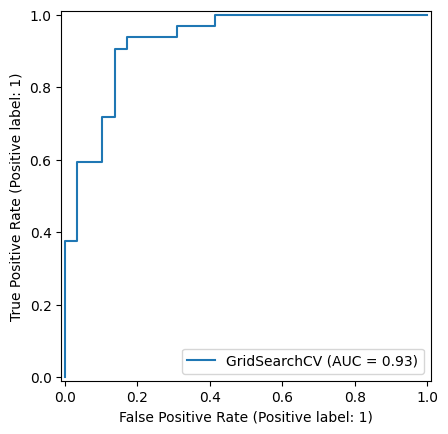

In [35]:
# Plot ROC curve and calculate AUC metric
RocCurveDisplay.from_estimator(gs_log_reg, x_test, y_test)
plt.show()

In [36]:
# This will show where out model made the mistakes.
print(confusion_matrix(y_test, y_preds))


[[25  4]
 [ 3 29]]


Now we will make the Classification Report as well as cross_validated_percision, recall and F1-score

In [37]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



Calculate evaluation metrics using cross-validation 

we're going to calculate perscision, recall and f1-score of out model using cross-validation and to do so we'll be using cross_val_score().

In [38]:
# Check best hyperparameters
gs_log_reg.best_params_

{'C': np.float64(0.20433597178569418), 'solver': 'liblinear'}

In [39]:
# Create a new calssifier with best parameters
clf = LogisticRegression(C=0.20433597178569418,
                         solver="liblinear")

In [40]:
# Cross-validated accuracy
cv_acc = cross_val_score(clf,
                         x,
                         y,
                         cv=5,
                         scoring="accuracy")
cv_acc

array([0.81967213, 0.90163934, 0.86885246, 0.88333333, 0.75      ])

In [41]:
# Cross-validated percision
cv_acc = np.mean(cv_acc)
cv_acc

np.float64(0.8446994535519124)

In [42]:
# Cross-validated recall
cv_precision = cross_val_score(clf,
                         x,
                         y,
                         cv=5,
                         scoring="precision")
cv_precision = np.mean(cv_precision)
cv_precision

np.float64(0.8207936507936507)

In [43]:
# Cross-validated f1-score
cv_recall = cross_val_score(clf,
                         x,
                         y,
                         cv=5,
                         scoring="recall")
cv_recall = np.mean(cv_recall)
cv_recall

np.float64(0.9212121212121213)

In [44]:
cv_f1 = cross_val_score(clf,
                         x,
                         y,
                         cv=5,
                         scoring="f1")
cv_f1 = np.mean(cv_f1)
cv_f1

np.float64(0.8673007976269721)

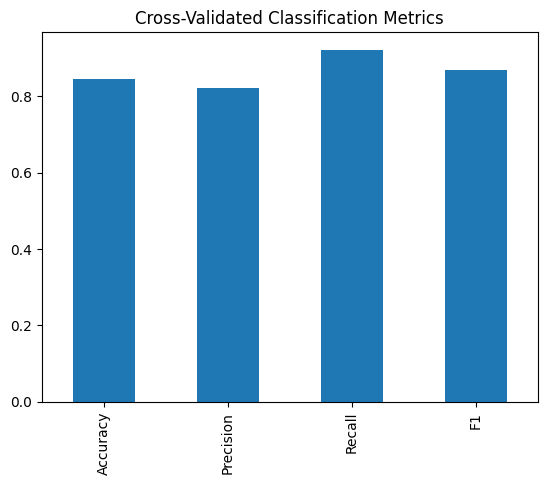

In [45]:
#Visualize cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy": [cv_acc],
                           "Precision": [cv_precision],
                           "Recall": [cv_recall],
                           "F1": [cv_f1]})
cv_metrics.T.plot.bar(title="Cross-Validated Classification Metrics",
                      legend=False);


### Feature Importance
Feature Importance is basically asking "Which features contributed most to the outcomes of the model and how did they contribute." 
Finding feature importance is different for each ML model, one way to find feature importance is to search for "(MODEL NAME) feature importance". 

In our case we will find the feature importance for our LogisticRegression model.

In [46]:
# Fit an instance of LogisticRegression
clf = LogisticRegression(C=0.20433597178569418,
                         solver="liblinear")
clf.fit(x_train, y_train);
clf.coef_ # Gives the coefficient 

array([[ 0.00316728, -0.86044626,  0.66067051, -0.01156993, -0.00166374,
         0.04386115,  0.31275826,  0.02459361, -0.60413065, -0.5686282 ,
         0.45051623, -0.63609885, -0.67663373]])

In [47]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [48]:
# Match coef's of features to columns so that it makes more sense
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': np.float64(0.0031672775125744686),
 'sex': np.float64(-0.8604462617531493),
 'cp': np.float64(0.6606705112737149),
 'trestbps': np.float64(-0.011569930915493508),
 'chol': np.float64(-0.0016637441846093658),
 'fbs': np.float64(0.04386114942757081),
 'restecg': np.float64(0.3127582620910283),
 'thalach': np.float64(0.02459361246994142),
 'exang': np.float64(-0.6041306524707951),
 'oldpeak': np.float64(-0.568628196677622),
 'slope': np.float64(0.4505162332451247),
 'ca': np.float64(-0.636098853689775),
 'thal': np.float64(-0.6766337271477075)}

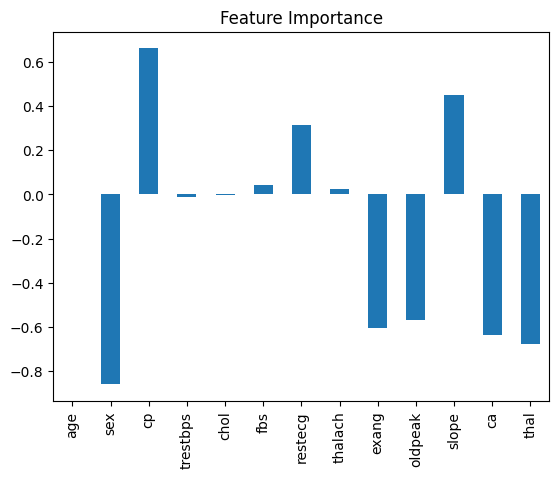

In [49]:
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title = "Feature Importance",
                      legend = False);

In [50]:
pd.crosstab(df["sex"], df["target"])

target,0,1
sex,,
0,24,72
1,114,93


In [51]:
pd.crosstab(df["slope"], df["target"])

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


slope: the slope of the peak exercise ST segment

        0: upsloping
        1: flat
        2: downsloping

In [5]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import joblib

# Load your data
df = pd.read_csv("your_data.csv")  # Use your actual data file
X = df.drop("target", axis=1)
y = df["target"]

# Split and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression(max_iter=1000)  # Create instance
model.fit(X_train, y_train)  # Train it

# Save the trained model
joblib.dump(model, "heart_disease_model.pkl")
print("Trained model saved successfully")

FileNotFoundError: [Errno 2] No such file or directory: 'your_data.csv'